# Dopamine D2 receptor - Data aquisition and cleaning
### Question: Can we predict the binding affinity of a molecule to the Dopamine D2 Receptor (DRD2) based on its chemical structure?

This means we are trying to map molecular features (descriptors/fingerprints) to bioactivity values (e.g., pIC50), so that we can predict the potency of unseen molecules.

In [1]:
import os
import sys
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [2]:
# Load data 
from chembl_webresource_client.new_client import new_client

# Search for the target (Dopamine D2 receptor)
target = new_client.target.search("DRD2").filter(organism='Homo sapiens').filter(target_type='SINGLE PROTEIN')
target_id = target[0]['target_chembl_id']  # Extract ChEMBL ID

# Fetch bioactivity data for this target
bioactivities = new_client.activity.filter(target_chembl_id=target_id)


In [58]:
data = pd.DataFrame.from_dict(bioactivities)
data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32111,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,None,None,CHEMBL1130912,Bioorg Med Chem Lett,1998.0,"{'bei': '14.63', 'le': '0.26', 'lle': '1.64', ...",CHEMBL303519,None,CHEMBL303519,5.01,0,http://www.openphacts.org/units/Nanomolar,108659,=,1,1,=,None,IC50,nM,None,9800.0,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,None,None,IC50,nM,UO_0000065,None,9800.0
1,None,None,33282,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,None,None,CHEMBL1130912,Bioorg Med Chem Lett,1998.0,"{'bei': '20.25', 'le': '0.37', 'lle': '3.83', ...",CHEMBL292943,None,CHEMBL292943,7.30,0,http://www.openphacts.org/units/Nanomolar,108665,=,1,1,=,None,IC50,nM,None,50.0,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,None,None,IC50,nM,UO_0000065,None,50.0
2,None,None,33812,[],CHEMBL670962,Inhibitor constant of compound for high affini...,B,None,None,BAO_0000192,BAO_0000357,single protein format,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,None,None,CHEMBL1132286,J Med Chem,1999.0,"{'bei': '28.87', 'le': '0.58', 'lle': '10.52',...",CHEMBL156651,None,CHEMBL156651,10.17,0,http://www.openphacts.org/units/Nanomolar,309100,=,1,1,=,None,Ki,nM,None,0.067,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,None,None,Ki,nM,UO_0000065,None,0.067
3,None,None,33813,[],CHEMBL666181,Inhibitor constant of compound for low affinit...,B,None,None,BAO_0000192,BAO_0000357,single protein format,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,None,None,CHEMBL1132286,J Med Chem,1999.0,"{'bei': '19.07', 'le': '0.38', 'lle': '7.07', ...",CHEMBL156651,None,CHEMBL156651,6.72,0,http://www.openphacts.org/units/Nanomolar,309100,=,1,1,=,None,Ki,nM,None,190.0,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,None,None,Ki,nM,UO_0000065,None,190.0
4,None,None,33814,[],CHEMBL666184,Percent of Dopamine receptor D2 in high affini...,B,None,None,BAO_0000179,BAO_0000357,single protein format,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,None,None,CHEMBL1132286,J Med Chem,1999.0,None,CHEMBL156651,None,CHEMBL156651,None,0,http://qudt.org/vocab/unit#Percent,309100,=,1,0,=,None,RH,%,None,53.0,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,None,None,RH,%,UO_0000187,None,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24624,None,% Of Inhibition,25788253,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5477509,Selectivity interaction (GPCR panel (PDSP scre...,B,None,None,BAO_0000179,BAO_0000357,single protein format,Nc1cnc(N2CCc3cc(S(=O)(=O)Nc4c(F)cc(Cl)cc4F)cc(...,None,None,CHEMBL5465560,None,2024.0,None,CHEMBL4585920,TP-020n,CHEMBL4585920,None,0,http://qudt.org/vocab/unit#Percent,4018673,=,65,0,=,None,% of inhibition,%,None,-0.42,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,None,None,% of inhibition,%,UO_0000187,None,-0.42
24625,None,None,25790573,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5479826,Selectivity interaction (GPCR panel (PDSP scre...,B,None,None,BAO_0000192,BAO_0000357,single protein fo

In [176]:
# data.isna().sum()


In [59]:
data.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value'], dtype='object')

In [163]:
# Removing all null values where there is no standard value or associated smile (dropped 24629-21091=3538)
data.dropna(subset=['standard_value', 'canonical_smiles'],inplace=True)

In [112]:
# data.head(5)
# data.isna().sum()
# data['standard_value'] = pd.to_numeric(data['standard_value'], errors='coerce')
# data[data['standard_value']<0] = False


In [164]:
data['type'].unique()

array(['IC50', 'Ki', 'RH', 'RL', 'RH/RL', 'Inhibition', 'EC50', 'Ratio',
       'Log Ki', 'Activity', 'pKi', 'K0.5', 'Intrinsic activity',
       'Intinsic activity', 'ED50', 'pD2', 'Max effect', 'Effect', 'nH',
       False, 'Binding affinity', 'pIC50', 'pKb', 'Log IC50', 'IA', 'Kd',
       'KL', 'Efficacy', 'D2 duration', 'Selectivity', 'Stimulation',
       'p[A50]', 'p[A]50', 'Bmax', 'Log 1/Ki', 'Log EC50', 'Emax', 'pKd',
       'INH', 'pEC50', 'Imax', 'Ratio Ki', 'Ratio EC50', 't1/2',
       'Ratio IC50', 'Potency', 'Ki(app)', 'logKi', 'Selectivity Index',
       'KiL', 'KiH', 'pKA', '%max', 'AC50', 'Kb', 'KB', 'log(activity)',
       'Ka', 'Ke', 'deltalog(Tau/KA)', 'pA2', 'K', 'Time', 'Occ', 'FC',
       'Activity_index', 'log(Tau/KA)', 'Kdiss', '% inhibition',
       '% Inhibition',
       '% Inhibition of Control Specific Binding (Mean n=2)',
       '% Inhibition of Control Agonist Response (Mean n=2)',
       '% of Control Agonist Response (Mean n=2)', '% Ctrl',
       'Mean f

In [165]:
## Saving to csv 
data.to_csv('./data/Dopamine_D2_receptor.csv', index=False)

In [177]:
# Load in dataset 
df = pd.read_csv('./data/Dopamine_D2_receptor.csv', low_memory=False)

# df_filtered.isnull().sum()


We only need to calculate pChEMBL if pchembl_value is missing or you want to control what measurements you are using. <br>
Calculate pChEMBL when: 
- pchembl_value is missing
- you want to use IC50/Ki/Kd values in nM
- You might be working with custom or cleaned data so it's safer to control the conversion yourself
<br>
Best practice:<br>
- Filter for values you trust and convert 


In [182]:
# Check how many pchembl_values are missing
df['pchembl_value'].isna().sum()

7893

In [189]:
# Keep Only Relevant Bioactivity Measurements
valid_units = ["nM"]  # We need numeric values in nM
valid_types = ["IC50", "Ki", "Kd", "pChEMBL Value"]

# Filter out values
df_filtered = df[
    df['standard_type'].isin(valid_types) & 
    df['standard_units'].isin(valid_units)  
    ].copy()

# pd.to_numeric(df['standard_value'], errors='coerce') > 0

# Convert IC50 to pIC50
def convert_to_pChEMBL(value):
    """Convert IC50/Ki/Kd from nM to pChEMBL (-log10)
        Removes 0 or negative entries 
    """
    try:
        value = float(value)
        if value <= 0:
            return np.Nan
        else:
            return -np.log10(value * 10e-9)
        
    except:
        np.NaN
    

df_filtered['pChEMBL'] = df_filtered['standard_value'].astype(float).apply(convert_to_pChEMBL)


In [192]:
df_filtered.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,pChEMBL
0,NaN,NaN,32111,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,NaN,NaN,BAO_0000190,BAO_0000219,cell-based format,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,NaN,NaN,CHEMBL1130912,Bioorg Med Chem Lett,1998.0,"{'bei': '14.63', 'le': '0.26', 'lle': '1.64', ...",CHEMBL303519,NaN,CHEMBL303519,5.01,0,http://www.openphacts.org/units/Nanomolar,108659,=,1,1,=,NaN,IC50,nM,NaN,9800.0,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,9800.0,4.008774
1,NaN,NaN,33282,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,NaN,NaN,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,NaN,NaN,CHEMBL1130912,Bioorg Med Chem Lett,1998.0,"{'bei': '20.25', 'le': '0.37', 'lle': '3.83', ...",CHEMBL292943,NaN,CHEMBL292943,7.30,0,http://www.openphacts.org/units/Nanomolar,108665,=,1,1,=,NaN,IC50,nM,NaN,50.0,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,50.0,6.301030
2,NaN,NaN,33812,[],CHEMBL670962,Inhibitor constant of compound for high affini...,B,NaN,NaN,BAO_0000192,BAO_0000357,single protein format,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,NaN,NaN,CHEMBL1132286,J Med Chem,1999.0,"{'bei': '28.87', 'le': '0.58', 'lle': '10.52',...",CHEMBL156651,NaN,CHEMBL156651,10.17,0,http://www.openphacts.org/units/Nanomolar,309100,=,1,1,=,NaN,Ki,nM,NaN,0.067,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,0.067,9.173925
3,NaN,NaN,33813,[],CHEMBL666181,Inhibitor constant of compound for low affinit...,B,NaN,NaN,BAO_0000192,BAO_0000357,single protein format,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,NaN,NaN,CHEMBL1132286,J Med Chem,1999.0,"{'bei': '19.07', 'le': '0.38', 'lle': '7.07', ...",CHEMBL156651,NaN,CHEMBL156651,6.72,0,http://www.openphacts.org/units/Nanomolar,309100,=,1,1,=,NaN,Ki,nM,NaN,190.0,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,190.0,5.721246
6,NaN,NaN,33816,[],CHEMBL665377,Inhibitor constant of compound for high affini...,B,NaN,NaN,BAO_0000192,BAO_0000357,single protein format,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,NaN,NaN,CHEMBL1132286,J Med Chem,1999.0,"{'bei': '27.54', 'le': '0.55', 'lle': '10.06',...",CHEMBL156651,NaN,CHEMBL156651,9.71,0,http://www.openphacts.org/units/Nanomolar,309100,=,1,1,=,NaN,Ki,nM,NaN,0.196,CHEMBL217,Homo sapiens,Dopamine D2 receptor,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,0.196,8.707744


Notes: <br>
Lipinski descriptors use Lipinski's Rule of Five following the molecular properties: <br>
- Molecular weight (MW) <= 500
- LogP (octanol-water partition coeff) <= 5
- H-bond donors (HBD) <= 5
- H-bond acceptors (HBA) <=10

These are used to estimate drug-likeness, not model performance and are helpful in pre-filtering compounds before modelling, understanding compound properties, feature selection if you want simple and interpretable QSAR models (don't rely on them for high-performing QSAR).



In [193]:
# Required data for rdkit molecular descriptors calculation
df_rdkit = df_filtered[['molecule_chembl_id', 'canonical_smiles', 'standard_type', 'standard_value', 'pchembl_value', 'pChEMBL']]
df_rdkit

,molecule_chembl_id,canonical_smiles,standard_type,standard_value,pchembl_value,pChEMBL
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,IC50,9800.0,5.01,4.008774
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,IC50,50.0,7.30,6.301030
2,CHEMBL156651,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,Ki,0.067,10.17,9.173925
3,CHEMBL156651,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,Ki,190.0,6.72,5.721246
6,CHEMBL156651,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,Ki,0.196,9.71,8.707744
...,...,...,...,...,...,...
21072,CHEMBL5465167,Cc1noc(C)c1-c1cnc2cc(C(=O)NCCC[n+]3ccc(N(C)C)c...,IC50,20000.0,NaN,3.698970
21077,CHEMBL2017291,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,100000.0,NaN,3.000000
21085,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,30000.0,NaN,3.522879
21087,CHEMBL4522930,CCC(F)(F)c1cc(N2CCC(S(C)(=O)=O)CC2)nc2sc(C(N)=...,Ki,341.44,6.47,5.466686


In [194]:
# Drop nan values for pchembl_value because this is what we are training out data on
# df_rdkit.dropna(subset=['pchembl_value'],inplace=True)


## EDA of dataset

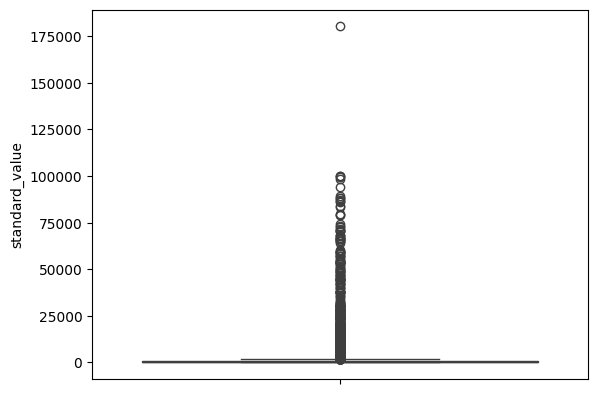

In [159]:
# df_rdkit['standard_value']
sns.boxplot( data =df_rdkit, y = df_rdkit['standard_value'])
plt.show()

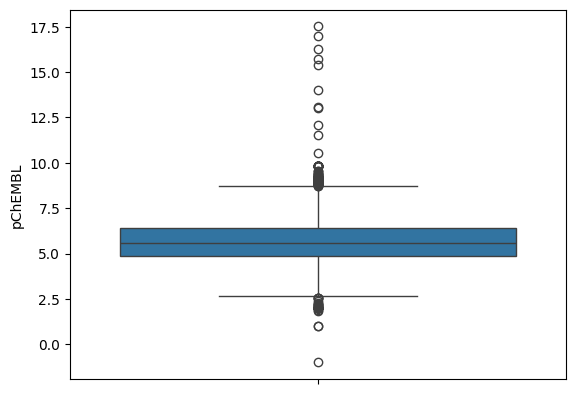

In [195]:
# Explore distribution of pchembl values
sns.boxplot( data =df_rdkit, y = (df_rdkit['pChEMBL']))
plt.show()

The clustering of high values at the top suggest there could be experimental noise or special cases or not been cleaned properly - lets explore this further or remove extreme cases.

In [ ]:
## Setting a cutoff to the standad value will help with interpreting test results. Large IC50 values are already poor 
## candidates for clinical trials, so capping pIC50 values at 10000000 will our data more uniform without sacrificing 
## the validity of our conclusions. 


In [ ]:

####
def standardize_and_conversion(dataset):
    store = []
    for x in dataset['standard_value']:
        ### Setting IC50 value cutoff at 10000000
        if x > 10000000:
            x = 10000000
        
        #### Converting IC50 value to molar values 
        molar_value = x*(10**-9)
        insert = -math.log(molar_value,10)
        store.append(insert)
    return store



Standard_value_norm = standardize_and_conversion(df_full.standard_value)

In [34]:
# (df_rdkit['pchembl_value']>10000).count()
# df_rdkit['pchembl_value'].count()
# len(df_rdkit)
df_rdkit['pchembl_value']


0         5.01
1         7.30
2        10.17
3         6.72
6         9.71
         ...  
20872     6.84
20873     6.22
21071     5.85
21087     6.47
21090     5.07
Name: pchembl_value, Length: 10952, dtype: float64

In [18]:
# ## Changing the standard values to class type for classification type model. 
# bioactivity_class =[]
# for x in data.standard_value:
#     if float(x) >= 10000:
#         bioactivity_class.append('inactive')
#     elif float(x) < 1000:
#         bioactivity_class.append('active')
#     else:
#         bioactivity_class.append('min effect')

In [19]:
## Saving to csv 
df_rdkit.to_csv('./data/Dopamine_D2_rdkit.csv', index=False)

## Generate molecular descriptors with RDKit
Convert SMILES to molecular descriptors

In [20]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors

In [196]:
# Function to turn SMILES to molecules and calculate descriptors
def mol_descriptors(molecules, verbose=False):

    # SMILES to molecules
    molData = []
    for x in molecules:
        mol = Chem.MolFromSmiles(x)
        molData.append(mol)
        
    # Calculate descriptors 
    storage = np.arange(1,1)
    i=0
    
    for y in molData:
        MolWt = Descriptors.MolWt(y)
        NumHDonors = Descriptors.NumHDonors(y)
        NumHAccept = Descriptors.NumHAcceptors(y)
        LogP = Descriptors.MolLogP(y)
        FractionCSP3 = rdMolDescriptors.CalcFractionCSP3(y)
        
        insert = np.array([MolWt, NumHDonors, NumHAccept, LogP, FractionCSP3])
        
        if (i==0):
            DescriptorData = insert
        else:
            DescriptorData = np.vstack([DescriptorData, insert])
        i+=1
        
    column_names = ['Molecular Weight', 'Number of Hydrogen Donors', 'Number of Hydrogen Acceptors', 'Lipophilicity', 'Fraction C sp3']
    Bind_Descriptors = pd.DataFrame(DescriptorData,columns=column_names)
    
    return Bind_Descriptors

In [22]:
df_descriptors = mol_descriptors(df_rdkit['canonical_smiles'])

In [23]:
df_descriptors

,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,Lipophilicity,Fraction C sp3
0,342.446,0.0,4.0,3.37000,0.272727
1,360.461,0.0,5.0,3.47440,0.272727
2,352.460,2.0,5.0,-0.35120,0.812500
3,352.460,2.0,5.0,-0.35120,0.812500
4,352.460,2.0,5.0,-0.35120,0.812500
...,...,...,...,...,...
10947,454.014,1.0,4.0,4.60240,0.346154
10948,418.541,3.0,4.0,3.73432,0.360000
10949,426.908,2.0,6.0,-0.63066,0.238095
10950,432.518,2.0,7.0,2.49260,0.529412


Need to figure out whether the entries where pchembl_values are Nan should be removed. and add morgan fingerprints :
AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) # Morgan FP